In [1]:
#The numpy module is used for scientific computing. It also has functions that deals with linear algebra and matrices.
import numpy as np
#Analysing data requires pandas, as it imports the data from different file formats
import pandas as pd
#matplotlib is used for visualizing data and plotting the graphs
import matplotlib.pyplot as plt
#Another visualization tool is seaborn which performs statistical computing
import seaborn as sns
#Scipy module is the extension of numpy library it performs both the scientific and tecnical computing
from scipy import stats
#sklearn.ensemble is a method used for regression as well as classification using RandomForest model
from sklearn.ensemble import RandomForestRegressor
#sklearn.metrics is used to evaluate the model, how best the model is working. Regression model uses mean_squared_error and mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
#sklearn.model_selection uses to split the data automatically with 25 percent test size
from sklearn.model_selection import train_test_split
#sklearn.metrics also calculates the variance of a model using r2_score function
from sklearn.metrics import r2_score

In [2]:
#Firstly, reading the data from directory using read_csv() function
data = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\after_preprocess_data.csv', encoding = 'iso-8859-1')
#data is the object which holds the dataset. To view the data imported, sample() is the function which prints random records from the dataset
data.sample(3)

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,price
1401,3.0,0,2,0,10245,0,0,1,0,0,1,1900,4.580980,8.220664
2594,4.0,0,0,3,14612,0,1,1,0,0,0,1936,4.615121,8.554682
4904,2.0,3,5,2,10967,1,1,0,0,1,1,1906,4.174387,8.373121


In [3]:
#Let's divide the whole dataset into 2 parts independent and dependent variables
#X is a variable which holds all the independent features
X = data.iloc[:, :-1]
#Y is a variable which holds the target feature(price) that is dependent column
y = data['price']

In [4]:
#here defining 4 variables before spliting the data
#X_train - stores the independent features of training data
#y_train - stores the target column of training data
#X_train - stores the independent features of testing data
#y_train - stores the target column of testing data
#here we are spliting the data 97.50% for training dataset and test size is for 2.5%
#setting random_state = 0 is just to reproduce the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)

In [5]:
#To check the training and testing data size we use function shape().
X_train.shape, X_test.shape

((12424, 13), (319, 13))

In [6]:
#Regression model is predicting continuous data, as linear_model is responsible.
#Ridge regression uses the least-squares criterian but adds a penealty for large variations in weight parameters
#The addition of a parameters penalty is called regularization. Regularization prevents overfitting by reducing complexity
from sklearn.linear_model import Ridge

In [7]:
#Ridge regression uses the L2_regularization, minimizes sum of squares of weight entries
#The influence of the regularization term is controlled by the alpha parameter
linridge = Ridge(alpha = 20.0).fit(X_train, y_train)
#"intercept_" is a parameter which calculates the bias value for the ridge regression model
print('Ridge regression linear model intercept: {}'.format(linridge.intercept_))
#"coef_" is a parameter which calculates the coefficients of ridge regression model
print('Ridge regression linear model coeff: {}'.format(linridge.coef_))
#score paramter calculates the r_2 score value for both training and testing data
print('R-squared score (test): {:.3f}'.format(linridge.score(X_test, y_test)))
print('R-squared score (training): {:.3f}'.format(linridge.score(X_train, y_train)))

Ridge regression linear model intercept: 8.799438513699776
Ridge regression linear model coeff: [-2.06661811e-02  5.33911211e-03  5.87479988e-03  5.85962148e-04
 -1.67284824e-05 -3.16717359e-02  1.22591063e-01  7.31840522e-02
  6.06143212e-02  1.47644943e-01  1.45186081e-01  6.93449990e-05
 -1.08435197e-01]
R-squared score (test): 0.449
R-squared score (training): 0.424


In [8]:
y_pred_linrid = linridge.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

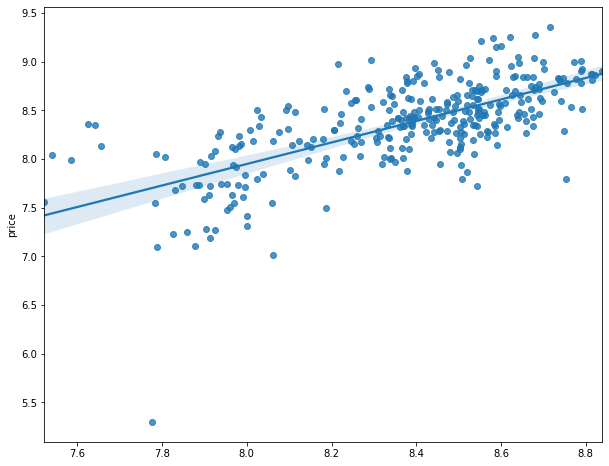

In [9]:
#Here just setting the figure size of plot, (x-axis, y-axis)
fig, axes = plt.subplots(figsize = (10, 8))
#seaborn module has the best function to plot hypothesis line on dataset that best understands the data
#As our graph shows most of the data points are lying on the hypothesis line
sns.regplot(y_pred_linrid, y_test, ax = axes)

In [10]:
#Another is the RandomForestRegressor which is one of the sofisticated models, works based on decision trees.
for i in range(1200, 3000, 100):
    #Iterating through different estimators gives us the intuition on number of estimators we get the best score
    #n_estimators is building number of trees before choosing the majority votes or average on predictions
    #max_features is set to 'sqrt', this is to select number of features for our model
    clf = RandomForestRegressor(n_estimators= i, max_features= 'sqrt', random_state = 0).fit(X_train, y_train)
    #predict() function is the predictor for the training data, which will predict the values
    y_hat_train = clf.predict(X_train)
    #predict() function is the predictor for the testing data, which will predict the values
    y_hat_test = clf.predict(X_test)
    print('R-squared score (training) for {} estimators:'.format(i), r2_score(y_train, y_hat_train)) 
    print('R-squared score (test) for {} estimators:'.format(i), r2_score(y_test, y_hat_test))
    

R-squared score (training) for 1200 estimators: 0.9628638167723637
R-squared score (test) for 1200 estimators: 0.8202834804835702
R-squared score (training) for 1300 estimators: 0.9628516617617222
R-squared score (test) for 1300 estimators: 0.820431626751795
R-squared score (training) for 1400 estimators: 0.962956094784418
R-squared score (test) for 1400 estimators: 0.8209352342196221
R-squared score (training) for 1500 estimators: 0.9629877461751255
R-squared score (test) for 1500 estimators: 0.8214485838485764
R-squared score (training) for 1600 estimators: 0.9630912760457204
R-squared score (test) for 1600 estimators: 0.8215583229511599
R-squared score (training) for 1700 estimators: 0.9631196894706852
R-squared score (test) for 1700 estimators: 0.82177696943459
R-squared score (training) for 1800 estimators: 0.963041133906865
R-squared score (test) for 1800 estimators: 0.8219143924515685
R-squared score (training) for 1900 estimators: 0.963111980705603
R-squared score (test) for 19

In [11]:
#From the above results we can see the best value for 1400 estimators
clf = RandomForestRegressor(n_estimators= 1400, max_features= 'sqrt', random_state = 0).fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)
print('R-squared score (train) data: ', r2_score(y_train, y_hat_train))
print('R-squared score (test) data: ', r2_score(y_test, y_hat_test))

R-squared score (train) data:  0.962956094784418
R-squared score (test) data:  0.8209352342196221


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

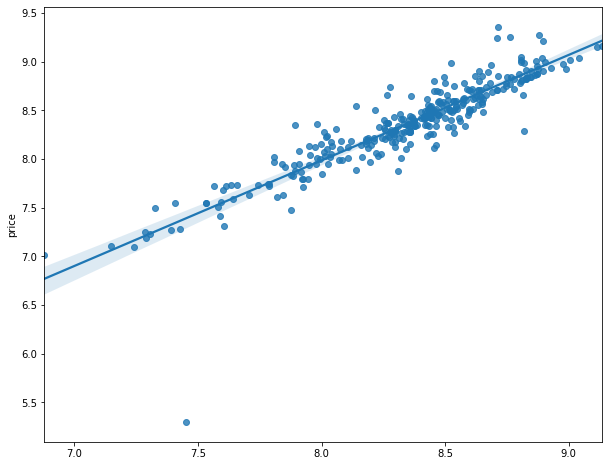

In [12]:
#Here just setting the figure size of plot, (x-axis, y-axis)
fig, axes = plt.subplots(figsize = (10, 8))
#seaborn module has the best function to plot hypothesis line on dataset that best understands the data
#As our graph shows most of the data points are lying on the hypothesis line
sns.regplot(y_hat_test, y_test, ax = axes)

In [13]:
from sklearn import ensemble
for i in range(500, 2500, 200):
    #GradientBoosting is a type of machine learning model. It is based on the idea that the probability for the next model.
    #GradientBoosting relies on the principle of ensemble. All the weak learners are putting up together to make the strong model.
    #max_depth is a parameter which takes an integer input, saying that in so many steps to converge the model
    #loss parameter takes 'ls' which is least-squares while calculating the loss 
    clf_grad = ensemble.GradientBoostingRegressor(n_estimators = i, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls').fit(X_train, y_train)
    y_hat_train_grad = clf_grad.predict(X_train)
    y_hat_test_grad = clf_grad.predict(X_test)
    print('R-squared score (training) for {} estimators:'.format(i), r2_score(y_train, y_hat_train_grad)) 
    print('R-squared score (test) for {} estimators:'.format(i), r2_score(y_test, y_hat_test_grad))

R-squared score (training) for 500 estimators: 0.903368024155361
R-squared score (test) for 500 estimators: 0.8142278530948861
R-squared score (training) for 700 estimators: 0.9262307524763855
R-squared score (test) for 700 estimators: 0.8168599292054337
R-squared score (training) for 900 estimators: 0.9406455873076719
R-squared score (test) for 900 estimators: 0.8253788154035357
R-squared score (training) for 1100 estimators: 0.9510892612513765
R-squared score (test) for 1100 estimators: 0.8260291901658319
R-squared score (training) for 1300 estimators: 0.9591839044501478
R-squared score (test) for 1300 estimators: 0.828851644879561
R-squared score (training) for 1500 estimators: 0.9652317723945201
R-squared score (test) for 1500 estimators: 0.8288937833135795
R-squared score (training) for 1700 estimators: 0.9701931568705453
R-squared score (test) for 1700 estimators: 0.8297909022374262
R-squared score (training) for 1900 estimators: 0.9738976256441579
R-squared score (test) for 1900

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

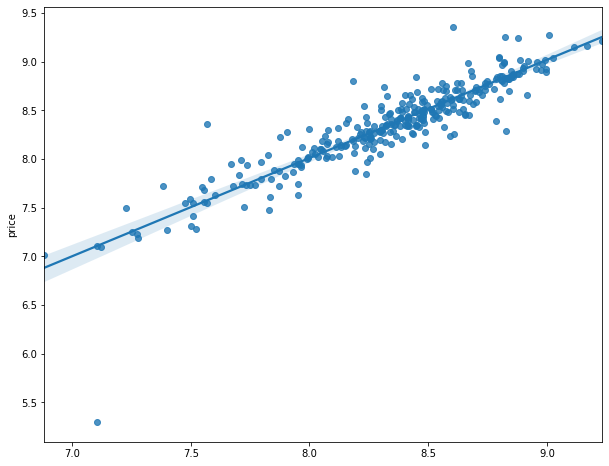

In [14]:
# At 2100 estimators, we get accuracy about "82.98%". This is performing better than randomforest.
fig, axes = plt.subplots(figsize = (10, 8))
#The graph shows most of the data lies on the hypothesis line, seems to good.
sns.regplot(y_hat_test_grad, y_test, ax = axes)

In [15]:
#sklearn.neighbors provisions the functionality for the classification and regression
#so importing KNeighborsRegressor model from the sklearn library
from sklearn.neighbors import KNeighborsRegressor

In [16]:
#A nearest neighbor algorithm needs 4 things to be specified:
#-A distance metric, typically Euclidian,
#-How many 'nearest' neighbors to look at?
#-Optional weighting function on the neighbor points
#-Method for aggregating the classes of neighbor points, that is Simple Majority Vote.
#KNeighborsRegressor works based on the averaging the distances of trained data from the new data point.
#Here 'K' defines the number of data points to consider for predicting the new value.
KNN_model = KNeighborsRegressor().fit(X_train, y_train)
y_hat_train_knn = KNN_model.predict(X_train)
y_hat_test_knn = KNN_model.predict(X_test)
print('R-squared score (training) data', r2_score(y_train, y_hat_train_knn)) 
print('R-squared score (test) data:', r2_score(y_test, y_hat_test_knn))

R-squared score (training) data 0.7988396855786163
R-squared score (test) data: 0.7389531678596115


In [17]:
#Going with default parameters for the KNeighbors, the training score is nearly 80% and test score is nealy 74%.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

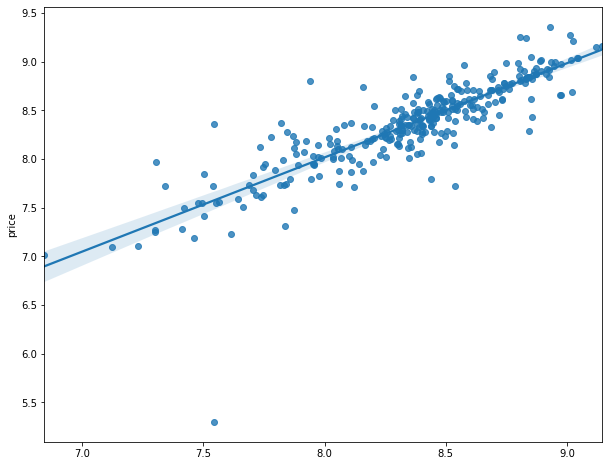

In [18]:
fig, axes = plt.subplots(figsize = (10, 8))
sns.regplot(y_hat_test_knn, y_test, ax = axes)